In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
base_path = '/home/jovyan/work/Molecular_Properties'

In [84]:
#sub1 = pd.read_csv(f'./submission_model_by_type_lgbm.csv')
#sub1 = pd.read_csv('./my_lgbm_responsible_chemistry_kernel.csv')
#sub1 = pd.read_csv('./my_lgbm_responsible_chemistry_kernel.csv')
sub1 = pd.read_csv('./my_lgb_and_sergej_kernel.csv')
#sub1 = pd.read_csv('./my_lgbm_responsible_chemistry_kernel_mpnn.csv')
#sub1 = pd.read_csv(f'./my_lgb_responsible_chemistry.csv')
#sub2 = pd.read_csv('./2019-07-09 09_19_00_LightGBM.csv')
#sub1 = pd.read_csv('./my_lgb_and_sergej_kernel.csv')
#sub1 = pd.read_csv(f'{base_path}/responsible_chemistry.csv')
#sub2 = pd.read_csv('./steal_like_an_electron_kernel.csv')
#sub2 = pd.read_csv('./weighted-avg-blend-lgb-keras-1-for_blending.csv')
#sub2 = pd.read_csv('./steal_like_an_electron_kernel.csv')
#sub2 = pd.read_csv('./submission_model_by_type_catboost.csv')
#sub2 = pd.read_csv('./stack_median.csv')
#sub2 = pd.read_csv('./сhemistry_of_subs_kernel.csv')
#sub2 = pd.read_csv(f'./submission_model_by_type_lgbm_10_folds.csv')
sub2 = pd.read_csv(f'{base_path}/responsible_chemistry.csv')
#sub2 = pd.read_csv(f'{base_path}/keras_nn_kernal.csv')
#sub2 = pd.read_csv(f'{base_path}/submission_mpnn.csv')
#sub2 = pd.read_csv('./submission_model_by_type_keras.csv')
#sub2 = pd.read_csv('./submission_model_by_type_keras_no_2JHN.csv')
#sub2 = pd.read_csv("./submission_model_by_type_keras_updated.csv")
print( sub1['scalar_coupling_constant'].describe())
print( sub2['scalar_coupling_constant'].describe())

count    2.505542e+06
mean     1.588567e+01
std      3.486345e+01
min     -3.042205e+01
25%     -2.263961e-01
50%      2.279954e+00
75%      7.340391e+00
max      2.034746e+02
Name: scalar_coupling_constant, dtype: float64
count    2.505542e+06
mean     1.588516e+01
std      3.485694e+01
min     -3.163485e+01
25%     -2.100354e-01
50%      2.288803e+00
75%      7.312868e+00
max      2.033617e+02
Name: scalar_coupling_constant, dtype: float64


In [69]:
# def trunc_at(s, d, n=3):
#     "Returns s truncated at the n'th (3rd by default) occurrence of the delimiter, d."
#     return d.join(s.split(d, n)[:n])

In [70]:
#sub2.scalar_coupling_constant = sub2.scalar_coupling_constant.to_string()

In [71]:
#sub2['scalar_coupling_constant'] = sub2['scalar_coupling_constant'].apply(lambda x: trunc_at(x, '.', 2))

In [72]:
#sub2['scalar_coupling_constant'] = pd.to_numeric(sub2['scalar_coupling_constant'])

In [73]:
#sub2.dtypes

In [85]:
sub1 = sub1.merge(sub2.drop_duplicates(subset=['id']), how = 'left',on = 'id')

In [86]:
sub1.describe()

,id,scalar_coupling_constant_x,scalar_coupling_constant_y
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588567e+01,1.588516e+01
std,7.232878e+05,3.486345e+01,3.485694e+01
min,4.658147e+06,-3.042205e+01,-3.163485e+01
25%,5.284532e+06,-2.263961e-01,-2.100354e-01
50%,5.910918e+06,2.279954e+00,2.288803e+00
75%,6.537303e+06,7.340391e+00,7.312868e+00
max,7.163688e+06,2.034746e+02,2.033617e+02


In [87]:
#sub1 = sub1.fillna("NaN")
#sub1.scalar_coupling_constant_y  = sub1.scalar_coupling_constant_y.fillna(value=sub1.scalar_coupling_constant_x)

In [88]:
( sub1['scalar_coupling_constant_x'] - sub1['scalar_coupling_constant_y']).abs().mean()

0.20775808836162582

In [89]:
sub1.describe()

,id,scalar_coupling_constant_x,scalar_coupling_constant_y
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588567e+01,1.588516e+01
std,7.232878e+05,3.486345e+01,3.485694e+01
min,4.658147e+06,-3.042205e+01,-3.163485e+01
25%,5.284532e+06,-2.263961e-01,-2.100354e-01
50%,5.910918e+06,2.279954e+00,2.288803e+00
75%,6.537303e+06,7.340391e+00,7.312868e+00
max,7.163688e+06,2.034746e+02,2.033617e+02


In [90]:
sub1['scalar_coupling_constant'] = (0.7*sub1['scalar_coupling_constant_x'] + 0.3*sub1['scalar_coupling_constant_y'])
sub1['scalar_coupling_constant'].describe()

count    2.505542e+06
mean     1.588552e+01
std      3.486107e+01
min     -3.078589e+01
25%     -2.178345e-01
50%      2.282665e+00
75%      7.329938e+00
max      2.034407e+02
Name: scalar_coupling_constant, dtype: float64

In [91]:
sub1['scalar_coupling_constant'].describe(include = 'all')

count    2.505542e+06
mean     1.588552e+01
std      3.486107e+01
min     -3.078589e+01
25%     -2.178345e-01
50%      2.282665e+00
75%      7.329938e+00
max      2.034407e+02
Name: scalar_coupling_constant, dtype: float64

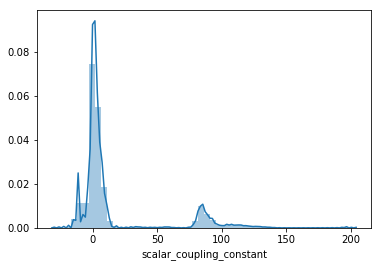

In [92]:
sns.distplot(sub1['scalar_coupling_constant'])

In [93]:
sub1[['id', 'scalar_coupling_constant']].to_csv('my_lgbm_sergej_resp_chemistry.csv', index=False)

In [94]:
!kaggle competitions submit -c champs-scalar-coupling -f my_lgbm_sergej_resp_chemistry.csv -m "sergej kernel and my lgbm responsible chemistry 70/30"

100%|██████████████████████████████████████| 64.0M/64.0M [00:04<00:00, 15.3MB/s]
Successfully submitted to Predicting Molecular Properties